In [98]:
import osmnx as ox

# 定义巴黎的地理位置和轨道交通、公交站、共享自行车站的标签
city = "Paris, France"
tags_railway = {"railway": ["station", "halt", "tram_stop"], 'station': 'subway'}
tags_bus = {'public_transport': 'station'}
tags_bike = tags_bike = {"bicycle_rental": "docking_station"}

# 获取巴黎轨道交通站的数量
stations_railway = ox.geometries_from_place(city, tags_railway)
num_railway_stations = len(stations_railway)

# 获取巴黎公交站数
stations_bus = ox.geometries_from_place(city, tags_bus)
num_bus_stations = len(stations_bus)

# 获取巴黎共享自行车站的数量
stations_bike = ox.geometries_from_place(city, tags_bike)
num_bike_stations = len(stations_bike)

print("巴黎轨道交通站数量:", num_railway_stations)
print("巴黎公交站数量:", num_bus_stations)
print("巴黎共享自行车站数量:", num_bike_stations)


巴黎轨道交通站数量: 485
巴黎公交站数量: 248
巴黎共享自行车站数量: 992


/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-98-b00129f26f65>:10: UserWarning:

The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.

<ipython-input-98-b00129f26f65>:14: UserWarning:

The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.

<ipython-input-98-b00129f26f65>:18: UserWarning:



In [99]:
import osmnx as ox

def count_transport_stations(coords, tags_information, radius=1000):
    # 初始化字典，用于存储每个站点类型的数量
    data = {key: [] for key in tags_information.keys()}

    # 遍历每个地点
    for place, coordinate in coords.items():
        # 遍历每个标签
        for key, tag in tags_information.items():
            try:
                # 检索特定标签的 POI
                gdf = ox.geometries_from_point(coordinate, tags=tag, dist=radius)
                data[key].append(len(gdf))
            except Exception as e:
                # 如果出现错误，记录错误信息
                print(f"Error with tag {key} at location {place}: {e}")
                data[key].append('Error')

    # 将数据转换为 Pandas DataFrame
    return pd.DataFrame(data, index=coords.keys())

# 定义标签信息
# tags_information = {
#     'Number of Bicycle Sharing': {'amenity': 'bicycle_rental'},
#     'Bus Station Number': {"highway": "bus_stop"},
#     'railway_station': {'railway': ["station", "halt", "tram_stop"]},
# }

tags_information = {
    'Bicycle Sharing Docking Station': {"bicycle_rental": "docking_station"},
    'Bus Station': {'public_transport': 'station'},
    'Railway Station': {'railway': ["station", "halt", "tram_stop"]},
}

# 定义坐标信息
coords = {
 'Gare du Nord, Paris': (48.881399, 2.357438),
 'Porte de la Chapelle, Paris': (48.8977035, 2.3594563),
 'Opéra Garnier, Paris': (48.87202885000001, 2.331785061251358),
 'Sacré Coeur, Paris': (48.88680575, 2.3430153448835087),
 'Place de la Bastille, Paris': (48.8534157, 2.3696321),
 'Arc de triomphe, Paris': (48.8737791, 2.295037226037673),
 'Olympiades, Paris': (48.8270448, 2.3664175),
 'Quartier de Javel, Paris': (48.8392472, 2.279050277443888),
 'Eglise du Saint-Esprit, Paris': (48.8382111, 2.397625542131148),
 'Place des Vosges, Paris': (48.85559575, 2.3655334556312413)
}

# 执行函数并打印结果
stations_count_df = count_transport_stations(coords, tags_information)
stations_count_df


/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-99-69a3eaa8019f>:13: UserWarning:

The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.

<ipython-input-99-69a3eaa8019f>:13: UserWarning:

The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.

<ipython-input-99-69a3eaa8019f>:13: UserWarning:



,Bicycle Sharing Docking Station,Bus Station,Railway Station
"Gare du Nord, Paris",68,16,18
"Porte de la Chapelle, Paris",20,3,13
"Opéra Garnier, Paris",77,24,26
"Sacré Coeur, Paris",54,12,14
"Place de la Bastille, Paris",48,10,14
"Arc de triomphe, Paris",49,17,19
"Olympiades, Paris",37,9,24
"Quartier de Javel, Paris",40,12,28
"Eglise du Saint-Esprit, Paris",31,9,22
"Place des Vosges, Paris",55,8,13


/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



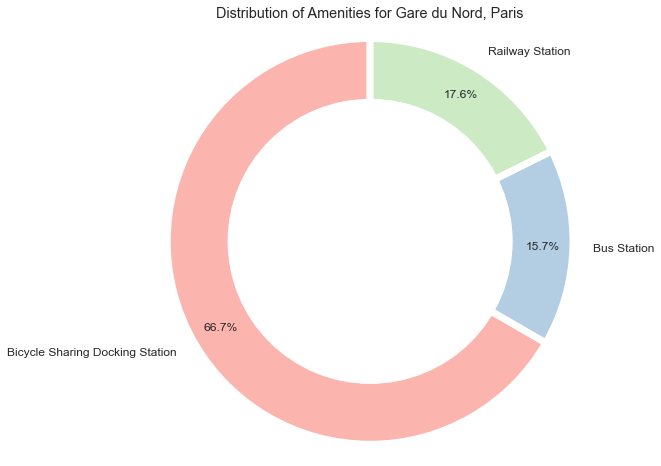

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from palettable.colorbrewer.qualitative import Pastel1_7
import seaborn as sns

def composition_chart(df, place, font_name='sans-serif', font_size=12, fig_size=(8, 8)):
    # Extract the data for the specified place
    data_row = df.loc[place]

    # Prepare the data for the pie chart
    sizes = data_row.values.tolist()
    categories = data_row.index.tolist()

    # Set font properties
    plt.rcParams['font.size'] = font_size
    plt.rcParams['font.family'] = font_name

    # Create a pie chart with the specified figure size
    plt.figure(figsize=fig_size)
    plt.pie(sizes, labels=categories, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=Pastel1_7.hex_colors, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

    # Draw a circle at the center to make it a donut chart
    center_circle = plt.Circle((0, 0), 0.70, color='white')
    plt.gcf().gca().add_artist(center_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')
    plt.title(f'Distribution of Amenities for {place}')
    plt.show()

# Call the function for a specific place
graph = composition_chart(stations_count_df, 'Gare du Nord, Paris')
graph 

def compare_places(df):
    list_places = []
    list_var = []
    list_number = []
    for place in df.index:
        for var in df.columns:
            list_places.append(place)
            list_var.append(var)
            list_number.append(df.loc[place, var])
    
    # Create a new dataframe with the lists
    df_new = pd.DataFrame({'Place': list_places, 'Variable': list_var, 'Number': list_number})
    fig = px.bar(df_new, x="Place", y="Number", color="Variable", width=800, height=500)
    fig.update_layout(showlegend=True)
    
    return fig

# Call the function
graph = compare_places(stations_count_df)
graph